# Corrected Analysis of Edible Insects Research (2015–2025)

This notebook the Scopus dataset provided for edible insects research (2015–2025). It verifies key statistics such as publication trends, keyword frequencies, thematic clusters, and country contributions. The analysis is intended to cross‑check and correct the figures reported in the draft manuscript - Dr. Yash M Gupta (c) 


In [1]:

import pandas as pd
import numpy as np
from collections import Counter
from itertools import combinations
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Load dataset
file_path = 'scopus (2).csv'
df = pd.read_csv(file_path)
# convert year to numeric and filter
YEAR_START, YEAR_END = 2015, 2025

# ensure numeric conversion
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
filtered_df = df[(df['Year'] >= YEAR_START) & (df['Year'] <= YEAR_END)].reset_index(drop=True)
print('Documents after filtering:', filtered_df.shape[0])


Documents after filtering: 1585


In [2]:

# Publication count per year
pub_counts = filtered_df['Year'].value_counts().sort_index()
print(pub_counts)


2015     88
2016     59
2017     89
2018    105
2019    105
2020    149
2021    160
2022    181
2023    198
2024    247
2025    204
Name: Year, dtype: int64


In [3]:

# Split author keywords by semicolon, lower‑case
filtered_df['Author Keywords'] = filtered_df['Author Keywords'].fillna('').str.lower()
filtered_df['Keyword_List'] = filtered_df['Author Keywords'].apply(lambda x: [k.strip() for k in x.split(';') if k.strip()])

# Flatten and count frequencies
all_keywords = [kw for sublist in filtered_df['Keyword_List'] for kw in sublist]
keyword_freq = Counter(all_keywords)

# Top 20 keywords
top20 = keyword_freq.most_common(20)
import pandas as pd
top20_df = pd.DataFrame(top20, columns=['Keyword','Frequency'])
print(top20_df)


                   Keyword  Frequency
0           edible insects        242
1              entomophagy        212
2            edible insect         57
3           sustainability         54
4            food security         54
5                  insects         53
6              food safety         51
7               novel food         41
8                nutrition         40
9                  cricket         33
10             fatty acids         32
11                  insect         32
12                    food         31
13       acheta domesticus         30
14          insect farming         30
15                 protein         29
16           aedes aegypti         29
17          insect protein         28
18     alternative protein         28
19  insecticide resistance         27


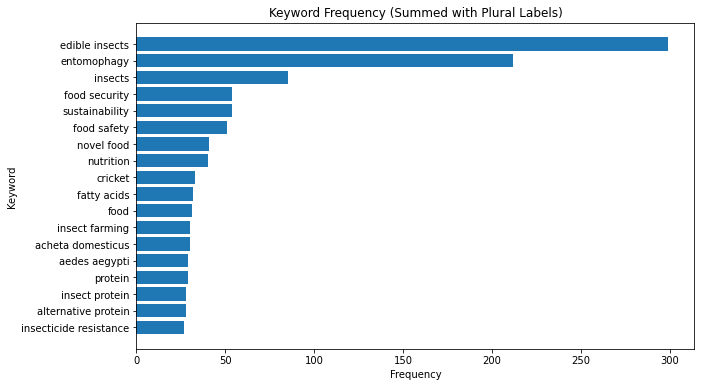

,PluralLabel,Frequency
4,edible insects,299
5,entomophagy,212
13,insects,85
9,food security,54
17,sustainability,54
8,food safety,51
14,novel food,41
15,nutrition,40
3,cricket,33
6,fatty acids,32


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Input data
data = {
    "Keyword": [
        "edible insects", "entomophagy", "edible insect", "sustainability", "food security",
        "insects", "food safety", "novel food", "nutrition", "cricket",
        "fatty acids", "insect", "food", "acheta domesticus", "insect farming",
        "protein", "aedes aegypti", "insect protein", "alternative protein", "insecticide resistance"
    ],
    "Frequency": [
        242, 212, 57, 54, 54,
        53, 51, 41, 40, 33,
        32, 32, 31, 30, 30,
        29, 29, 28, 28, 27
    ]
}

# Create DataFrame
df = pd.DataFrame(data)
# Adjust aggregation to keep plural labels but still sum singular + plural frequencies

# Map singular -> plural label if plural exists in dataset
def keep_plural_label(keyword):
    if keyword.endswith("s"):  # plural case
        return keyword
    elif keyword + "s" in df["Keyword"].values:  # if plural exists, map singular to plural
        return keyword + "s"
    else:
        return keyword

df["PluralLabel"] = df["Keyword"].apply(keep_plural_label)

# Aggregate again
df_plural = df.groupby("PluralLabel", as_index=False)["Frequency"].sum().sort_values(by="Frequency", ascending=False)

# Plot with plural labels
plt.figure(figsize=(10,6))
plt.barh(df_plural["PluralLabel"], df_plural["Frequency"])
plt.gca().invert_yaxis()
plt.title("Keyword Frequency (Summed with Plural Labels)")
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.show()

df_plural



In [6]:
from itertools import combinations

# Build co-occurrence counter
co_counter = Counter()

for kws in filtered_df['Keyword_List']:
    kws_set = set(kws)   # unique per document
    for combo in combinations(sorted(kws_set), 2):  # all 2-pairs in this row
        co_counter[combo] += 1

# Get Top 20 co-occurring pairs
top20_co = co_counter.most_common(20)

# Put into DataFrame for nicer view
top20_co_df = pd.DataFrame(top20_co, columns=['Keyword Pair','Co-occurrence'])
print(top20_co_df)


                          Keyword Pair  Co-occurrence
0        (edible insects, entomophagy)             59
1         (entomophagy, food security)             26
2        (edible insects, food safety)             21
3     (edible insects, sustainability)             20
4      (edible insects, food security)             19
5           (entomophagy, food safety)             18
6        (entomophagy, sustainability)             15
7            (entomophagy, novel food)             14
8          (edible insects, nutrition)             14
9           (amino acids, fatty acids)             13
10        (edible insects, novel food)             12
11              (entomophagy, insects)             12
12            (entomophagy, nutrition)             12
13        (edible insect, entomophagy)             11
14       (entomophagy, insect farming)             11
15    (edible insects, insect farming)             11
16          (food safety, novel foods)             10
17  (consumer acceptance, en


Top 20 Co-occurrence Pairs:
                   source               target  weight
408        edible insects          entomophagy      59
586           entomophagy        food security      26
436        edible insects          food safety      21
279        edible insects       sustainability      20
1973       edible insects        food security      19
440           entomophagy          food safety      18
1280          entomophagy       sustainability      15
489           entomophagy           novel food      14
4889       edible insects            nutrition      14
4122          amino acids          fatty acids      13
903        edible insects           novel food      12
5032          entomophagy            nutrition      12
3987          entomophagy              insects      12
7459       edible insects       insect farming      11
579         edible insect          entomophagy      11
3754          entomophagy       insect farming      11
2035  consumer acceptance          e

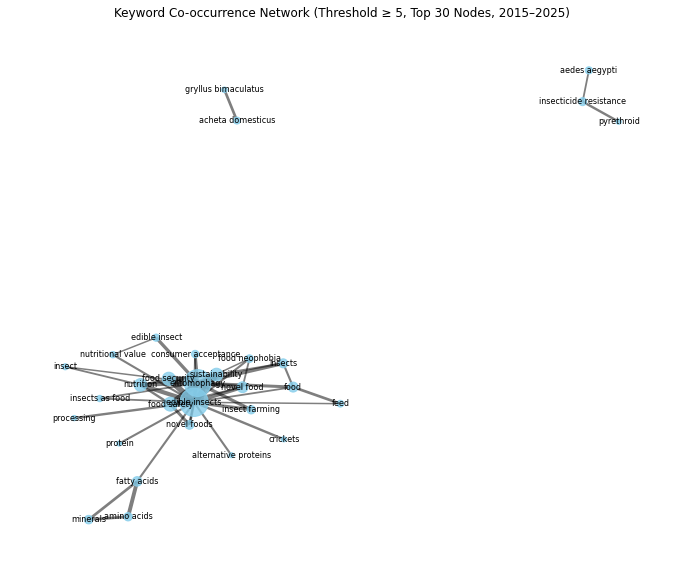

In [ ]:
import pandas as pd
import re
from collections import Counter
from itertools import combinations
import networkx as nx   # <-- this was missing
import matplotlib.pyplot as plt


file_path = "scopus (2).csv"  # change to your filename
df = pd.read_csv(file_path)


# Redo
df_year_filtered = df[(df['Year'] >= 2015) & (df['Year'] <= 2025)].copy()
df_year_filtered['Author Keywords'] = df_year_filtered['Author Keywords'].fillna('').str.lower()
df_year_filtered['Keyword_List'] = df_year_filtered['Author Keywords'].apply(
    lambda x: [kw.strip() for kw in re.split(r';|,', x) if kw.strip()]
)

edge_counts = Counter()
for kws in df_year_filtered['Keyword_List']:
    for a, b in combinations(sorted(set(kws)), 2):  # unique per document
        edge_counts[(a, b)] += 1

# Convert to DataFrame
edges_df = pd.DataFrame([(*k, v) for k, v in edge_counts.items()],
                        columns=["source", "target", "weight"]).sort_values("weight", ascending=False)

print("\nTop 20 Co-occurrence Pairs:")
print(edges_df.head(20))

# -------------------------------
# Step 4: Build NetworkX Graph
# -------------------------------
G = nx.Graph()

# Node frequencies (unique-row frequency)
keyword_counts = Counter([kw for kws in df_year_filtered['Keyword_List'] for kw in set(kws)])
for kw, freq in keyword_counts.items():
    G.add_node(kw, frequency=freq)

# Add edges with threshold ≥ 5
for s, t, w in edges_df.itertuples(index=False):
    if w >= 5:
        G.add_edge(s, t, weight=w)

# -------------------------------
# Step 5: Compute node strength
# -------------------------------
strength = {n: sum(d['weight'] for _, _, d in G.edges(n, data=True)) for n in G.nodes()}

# Top 30 strongest nodes
top_nodes = set(sorted(strength, key=strength.get, reverse=True)[:30])
H = G.subgraph(top_nodes)

# -------------------------------
# Step 6: Plot Network
# -------------------------------
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(H, seed=42, k=0.35)

# Draw nodes sized by strength
nx.draw_networkx_nodes(
    H, pos,
    node_size=[5 + 3 * strength[n] for n in H.nodes()],
    node_color="skyblue",
    alpha=0.8
)

# Draw edges sized by weight
nx.draw_networkx_edges(
    H, pos,
    width=[d['weight'] * 0.3 for _, _, d in H.edges(data=True)],
    alpha=0.5
)

# Draw labels
nx.draw_networkx_labels(H, pos, font_size=8)

plt.title("Keyword Co-occurrence Network (Threshold ≥ 5, Top 30 Nodes, 2015–2025)", fontsize=12)
plt.axis("off")
plt.show()


In [16]:

# Prepare abstracts and apply TF‑IDF and NMF
abstracts = filtered_df['Abstract'].fillna('').astype(str)
vectorizer = TfidfVectorizer(max_df=0.95, min_df=5, stop_words='english', max_features=5000)
X = vectorizer.fit_transform(abstracts)

nmf = NMF(n_components=6, random_state=42, init='nndsvd', max_iter=200)
W = nmf.fit_transform(X)
H = nmf.components_

try:
    feature_names = vectorizer.get_feature_names_out()
except AttributeError:
    feature_names = vectorizer.get_feature_names()

# Display top terms for each topic
for i, topic in enumerate(H):
    top_indices = topic.argsort()[::-1][:10]
    top_terms = [feature_names[j] for j in top_indices]
    print(f"Topic {i}: {', '.join(top_terms)}")

# Assign dominant topic to each document
dominant_topics = W.argmax(axis=1)
filtered_df['Dominant_Topic'] = dominant_topics

# Topic distribution
import numpy as np
topic_counts = np.bincount(dominant_topics, minlength=6)
print('Document counts per topic:')
for i, count in enumerate(topic_counts):
    print(f"Topic {i}: {count}")


Topic 0: insects, food, edible, insect, consumption, entomophagy, products, production, foods, sustainable
Topic 1: resistance, ae, aegypti, populations, insecticide, mutations, kdr, pyrethroid, deltamethrin, vector
Topic 2: protein, acids, cricket, acid, content, fatty, powder, 100, mg, properties
Topic 3: feed, meal, fish, diets, fed, diet, crickets, growth, cricket, production
Topic 4: species, genetic, coi, dna, diversity, anopheles, specimens, gene, sequences, genes
Topic 5: peptides, proteins, infection, venom, expression, activity, cells, shrimp, mosquito, anti
Document counts per topic:
Topic 0: 470
Topic 1: 97
Topic 2: 351
Topic 3: 180
Topic 4: 164
Topic 5: 323


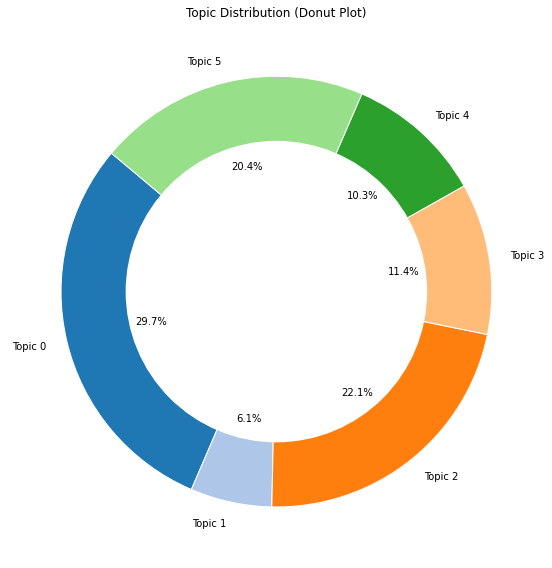

In [17]:
# Input data for topics
topic_data = {
    "Topic": ["Topic 0", "Topic 1", "Topic 2", "Topic 3", "Topic 4", "Topic 5"],
    "Count": [470, 97, 351, 180, 164, 323]
}

df_topic = pd.DataFrame(topic_data)

# Donut plot
plt.figure(figsize=(8,8))
colors = plt.cm.tab20.colors

# Pie chart with a hole in the middle
wedges, texts, autotexts = plt.pie(
    df_topic["Count"],
    labels=df_topic["Topic"],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# Draw circle for donut effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Topic Distribution (Donut Plot)")
plt.tight_layout()
plt.show()


In [18]:

import re
# Extract country names from the Affiliations field
country_docs = {}
for aff in filtered_df['Affiliations'].fillna(''):
    countries = set()
    for part in aff.split(';'):
        country = re.sub(r'\d+', '', part.split(',')[-1]).strip()
        if country:
            countries.add(country)
    for c in countries:
        country_docs[c] = country_docs.get(c, 0) + 1

# Convert to DataFrame and show top 15
country_df = pd.DataFrame(sorted(country_docs.items(), key=lambda x: x[1], reverse=True), columns=['Country','Document_Count'])
print(country_df.head(15))


           Country  Document_Count
0         Thailand             344
1    United States             211
2            China             207
3          Germany             113
4            India             112
5            Italy             100
6   United Kingdom              94
7            Kenya              69
8            Japan              67
9      South Korea              67
10     Netherlands              66
11        Malaysia              64
12          Mexico              59
13         Denmark              59
14          France              57


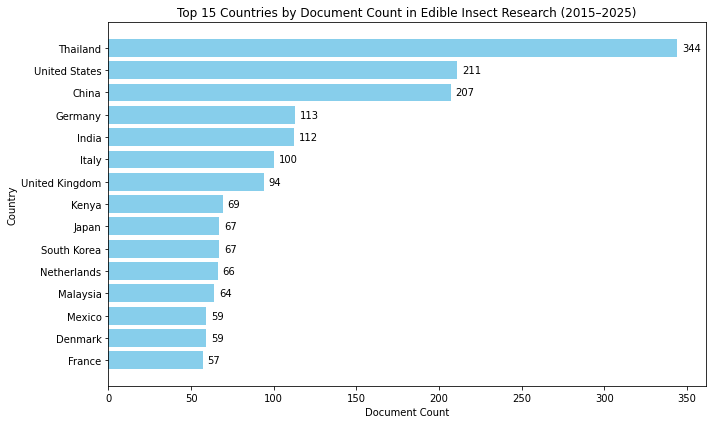

In [19]:
# Input data for countries and document counts
country_data = {
    "Country": [
        "Thailand", "United States", "China", "Germany", "India", "Italy",
        "United Kingdom", "Kenya", "Japan", "South Korea", "Netherlands",
        "Malaysia", "Mexico", "Denmark", "France"
    ],
    "Document_Count": [
        344, 211, 207, 113, 112, 100,
        94, 69, 67, 67, 66,
        64, 59, 59, 57
    ]
}

df_country = pd.DataFrame(country_data)

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
plt.barh(df_country["Country"], df_country["Document_Count"], color="skyblue")
plt.gca().invert_yaxis()

plt.title("Top 15 Countries by Document Count in Edible Insect Research (2015–2025)")
plt.xlabel("Document Count")
plt.ylabel("Country")

# Annotate counts on bars
for i, v in enumerate(df_country["Document_Count"]):
    plt.text(v + 3, i, str(v), va='center')

plt.tight_layout()
plt.show()


In [20]:
import plotly.express as px

# Interactive choropleth using Plotly
fig = px.choropleth(
    df_country,
    locations="Country",
    locationmode="country names",
    color="Document_Count",
    hover_name="Country",
    color_continuous_scale="Blues",
    title="Global Distribution of Edible Insect Research Publications (2015–2025)",
    width=1200,   # Set figure width
    height=700    # Set figure height
)

fig.show()


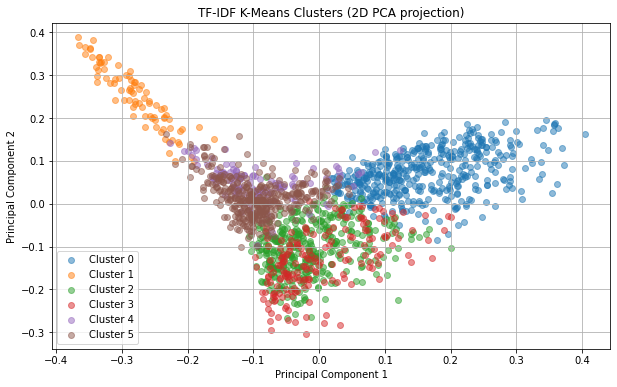

Results exported to analysis_results.csv


In [25]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Prepare text data
corpus = filtered_df['Abstract'].fillna('').astype(str).tolist()

# Vectorize with TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=5, stop_words='english', max_features=5000)
X_vec = vectorizer.fit_transform(corpus)

# Apply KMeans clustering (6 clusters)
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_vec)
filtered_df['Cluster'] = clusters

# PCA transformation
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_vec.toarray())

# Plot clusters
plt.figure(figsize=(10,6))
for cluster_label in sorted(set(clusters)):
    mask = (clusters == cluster_label)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f'Cluster {cluster_label}', alpha=0.5)
plt.title('TF-IDF K-Means Clusters (2D PCA projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Export results
# Save document titles, years, dominant topics and clusters to CSV
export_cols = ['Title', 'Year']
if 'Dominant_Topic' in filtered_df.columns:
    export_cols.append('Dominant_Topic')
export_cols.append('Cluster')

export_df = filtered_df[export_cols]
export_df.to_csv('analysis_results.csv', index=False)
print('Results exported to analysis_results.csv')
